<a href="https://colab.research.google.com/github/champ-rtu/CE888/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [30]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random
import scipy.stats as st

# **Customers dataset**

In [29]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
df
data.shape[0]

14

In [4]:
df.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [230]:
#Function for confidence interval for mean
def ci_m(data, confidence): 
  m = np.mean(data)
  a = st.t.interval(alpha=confidence, df=len(data)-1,loc=m,scale =st.sem(data))
  return a

#Function for cofidence interval for normal distribution
def ci_n(data, confidence): 
  m = np.mean(data)
  a = st.norm.interval(alpha=confidence, loc=m, scale =st.sem(data))
  return a

In [201]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
  stat = []
  mean = []
  stat2 = []
  for i in range(n_bootstraps):
    sample = []
    for j in range(sample_size):
      sample.append(random.choice(x))
    stat.append(np.mean(sample))
  stat.sort()  
  p_up = np.percentile(stat, 97.5 )
  p_low = np.percentile(stat, 2.5 )
  for i in stat:
    if i >p_up :
      stat.remove(i)
    elif i  <p_low:
      stat.remove(i)
    else:
      stat2.append(i)


      
  mean.append(np.mean(stat2))
  low = stat2[0]
  up = stat2[-1]
  b = ci_m(stat2, 0.95)

  return np.mean(mean),low,up,b


In [202]:
boot = bootstrap_mean(data, data.shape[0], 1000)
print(boot)

(9.174628210905814, 6.428571428571429, 12.357142857142858, (9.089204168528093, 9.260052253283535))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

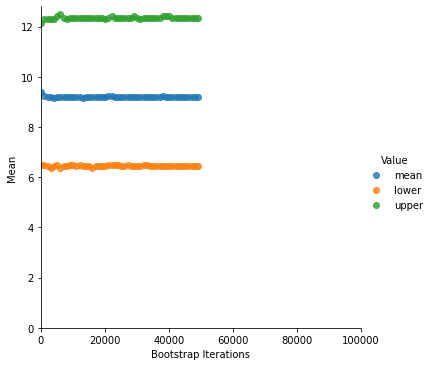

In [200]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [231]:
def bootstrap_mean_ci(x, sample_size, n_bootstraps, ci):
  stat = []
  stat2 = []
  mean = []
  for i in range(n_bootstraps):
    sample = []
    for j in range(sample_size):
      sample.append(random.choice(x))
    stat.append(np.mean(sample))
  stat.sort()  
  c = (100-ci)/2
  p_up = np.percentile(stat, 100-c )
  p_low = np.percentile(stat, c )
  for i in stat:
    if i >p_up :
      stat.remove(i)
    elif i  <p_low:
      stat.remove(i)
    else:
      stat2.append(i)
  mean.append(np.mean(stat2))
  low = stat2[0]
  up = stat2[-1]
  b = ci_m(stat2, ci/100)
  c = ci_n(stat2, ci/100)

  return np.mean(mean), stat2[0], stat2[-1], b, c

In [232]:
boot = bootstrap_mean_ci(data, data.shape[0], 10000, 80)
boot

(9.170810916041342,
 7.285714285714286,
 11.214285714285714,
 (9.156039353688763, 9.18558247839392),
 (9.15604056271072, 9.185581269371964))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

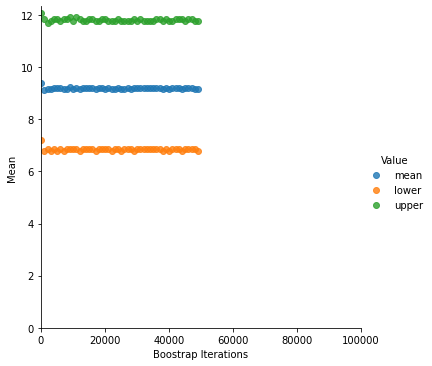

In [219]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 90)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [233]:
cus_90 = bootstrap_mean_ci(data, data.shape[0], 10000, 90)
cus_90

(9.17787053079225,
 6.785714285714286,
 11.785714285714286,
 (9.157037535616633, 9.198703525967867),
 (9.157039663679726, 9.198701397904774))

In [234]:
cus_95 = bootstrap_mean_ci(data, data.shape[0], 10000, 95)
cus_95

(9.227170338334009,
 6.5,
 12.285714285714286,
 (9.200686789493746, 9.253653887174272),
 (9.200690159414195, 9.253650517253822))

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [13]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df2 = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df2.head()

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [14]:
#Missing checking
df2.isna().sum()

Current fleet      0
New Fleet        170
dtype: int64

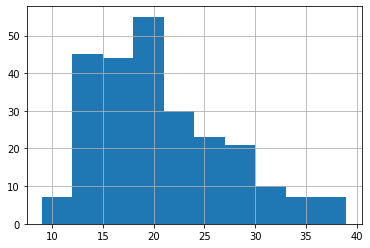

In [15]:
df2['Current fleet'].hist() #distribution plot for Current fleet

In [16]:
n_fleet = df2['New Fleet'].values #create n_fleet
n_fleet = pd.DataFrame(n_fleet) #create new dataframe for New_fleet 
n_fleet = n_fleet.dropna() #drop missing value 
n_fleet.shape


(79, 1)

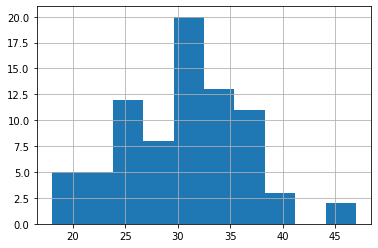

In [10]:
df2['New Fleet'].hist() #Plot distribution for New fleet

In [17]:
c_fleet = df2['Current fleet'] #create c_fleet
c_fleet = c_fleet.values

type(n_fleet)

pandas.core.frame.DataFrame

In [18]:
c_fleet.shape

(249,)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [244]:
c_f = c_fleet.ravel()
c_f.shape

(249,)

In [248]:
# <---INSERT YOUR CODE HERE--->

#cofident interval 
n_99 = bootstrap_mean_ci(n_f, len(n_f), 10000, 99) #confident interval for mean at 99%
c_85 = bootstrap_mean_ci(c_f, len(c_f),10000, 85) #confident interval for mean at 85%






In [249]:
n_99 # result

(30.48116097685718,
 28.70886075949367,
 32.24050632911393,
 (30.464317722147605, 30.498004231566753),
 (30.46432096982553, 30.49800098388883))

In [250]:
c_85 #result

(20.146564382899108,
 19.57429718875502,
 20.72690763052209,
 (20.142063801219965, 20.15106496457825),
 (20.142064207798942, 20.151064557999273))

In [251]:
n_f = n_fleet.values.ravel() #reshape n_fleet for similar with c_fleet
n_f.shape

(79,)

In [346]:
c_fleet.shape

(249,)

In [252]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    
    mean1 = bootstrap_mean_ci(sample1, len(sample1),n_permutations,95)
    mean2 = bootstrap_mean_ci(sample2, len(sample2), n_permutations, 95)
    t_obs = mean2[0] - mean1[0]
    p = 0
    concat = np.concatenate([sample1, sample2])

    for i in range(n_permutations):
      
      perm = np.random.permutation(concat)
      
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      t_perm = np.mean(pnew)-np.mean(pold)
      if t_perm>t_obs:
        p = p+1


    pvalue = p/n_permutations
    return pvalue

In [253]:
a = permut_test(c_fleet, n_f, 30000) # apply permutation test

In [254]:
a #result ; p value is 0

0.0

In [322]:
def exact_mc_perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc

# **Vote data**

In [255]:
#Vote_dataset
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [356]:
len(dem_share_OH) #check lenght of dem_share_OH

88

In [357]:
len(dem_share_PA) #Check lenght of dem_share_PA

67

In [259]:
b = permut_test(dem_share_OH,dem_share_PA,  20000) # Apply permutation test

In [260]:
b #the result: p-value is 0.23

0.23725

In [256]:
oh = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000, 90) #confident interval for mean
oh

(44.31627456060606,
 42.601818181818174,
 46.05136363636364,
 (44.307168588823615, 44.32538053238851),
 (44.30716896375787, 44.325380157454255))

In [258]:
pa = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000, 90) #confident interval for mean
pa

(45.48544490215589,
 43.54044776119404,
 47.45955223880597,
 (45.47516598209068, 45.4957238222211),
 (45.47516640532054, 45.49572339899124))